In [1]:
import torch
import torch.nn as nn


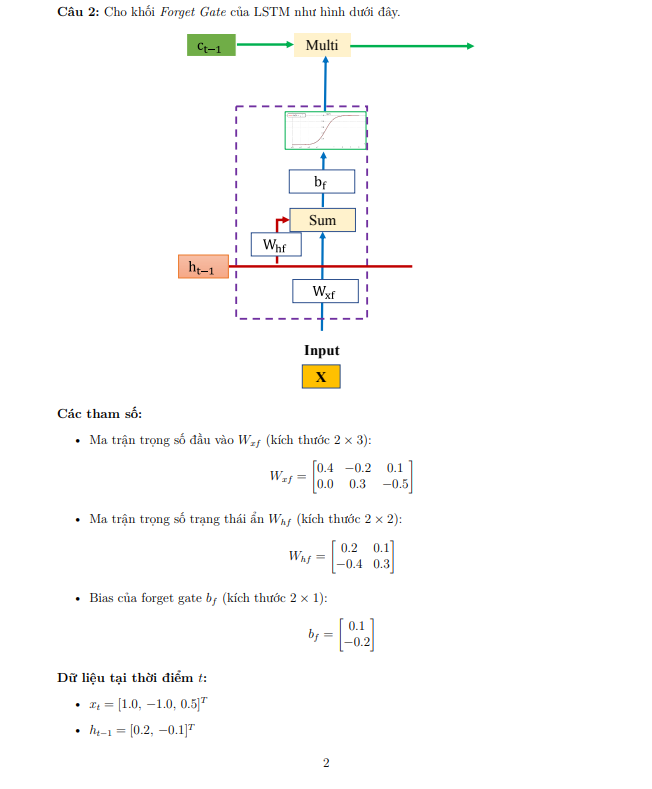

In [2]:
x= torch.Tensor([[1.0],
                 [-1.0],
                 [0.5]])
W_if =torch.Tensor([[0.4, -0.2, 0.1],
                    [0.0, 0.3, -0.5]])
W_hf = torch.tensor([
    [0.2, 0.1],
    [-0.4, 0.3]
])
h_previous = torch.Tensor([[0.2],
                           [-0.1]])
bias= torch.Tensor([[0.1],
                    [-0.2]])
cell_t_0= torch.Tensor([[1.5],
                        [-0.8]])


In [3]:
z_o = W_hf@h_previous
z_1= W_if@x +bias
result = z_o + z_1

In [4]:
cell_fg= nn.Sigmoid()(result)
cell_fg

tensor([[0.6857],
        [0.2973]])

In [5]:
cell_fg.shape, cell_t_0.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [6]:
result_2= cell_fg * cell_t_0
result_2

tensor([[ 1.0285],
        [-0.2379]])

In [7]:
# import torch
# import torch.nn as nn

# x_t = torch.tensor([[1.0], [-1.0], [0.5]])
# h_prev = torch.tensor([[0.2], [-0.1]])

# c_prev = torch.tensor([[1.5, -0.8]])
# forget_layer = nn.Linear(5, 2)
# with torch.no_grad():
#     W_xf = torch.tensor([[0.4, -0.2, 0.1], [0.0, 0.3, -0.5]])
#     W_hf = torch.tensor([[0.2, 0.1], [-0.4, 0.3]])
#     b_f_val = torch.tensor([0.1, -0.2])

#     W_star = torch.cat((W_xf, W_hf), dim=1)
#     forget_layer.weight.copy_(W_star)
#     forget_layer.bias.copy_(b_f_val)
# input_concat = torch.cat((x_t, h_prev), dim=0).T  # Shape: (1, 5)

# z_f = forget_layer(input_concat)
# f_t = torch.sigmoid(z_f)

# print(f"f_t (Hệ số quên): \n{f_t}")
# result_2 = f_t * c_prev

# print(f"\nResult 2 (Giá trị sau khi quên): \n{result_2}")

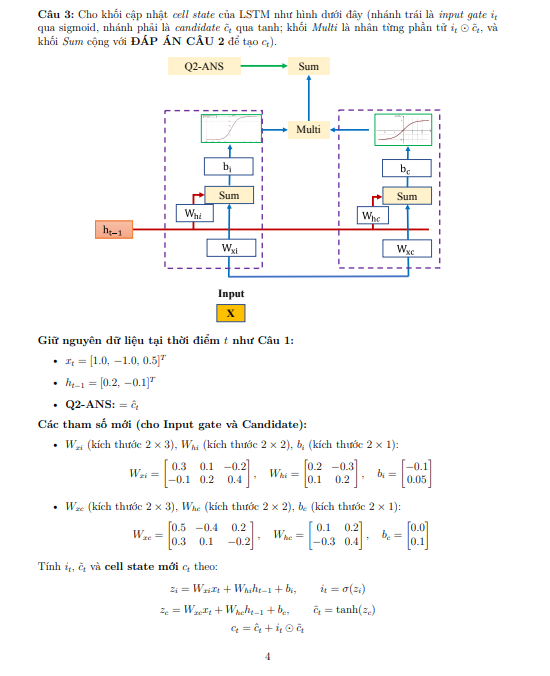

In [8]:
c_t= cell_t_0
c_t

tensor([[ 1.5000],
        [-0.8000]])

In [9]:
h_prev = torch.tensor([[0.2], [-0.1]])

In [10]:
W_xi = torch.Tensor([[0.3, 0.1, -0.2],
                     [-0.1, 0.2, 0.4]])
W_hi= torch.Tensor([[0.2, -0.3],
                    [0.1, 0.2]])

b_i = torch.Tensor([[-0.1],
                    [0.05]])



In [11]:
W_xc = torch.Tensor([[0.5, -0.4, 0.2],
                     [0.3, 0.1, -0.2]])
W_hc= torch.Tensor([[0.1, 0.2],
                    [-0.3, 0.4]])
b_c= torch.Tensor([[0.0],
                   [0.1]])

In [12]:
input_gate = W_xi@x+ W_hi@h_prev + b_i
i_t= torch.sigmoid(input_gate)

In [13]:
i_t

tensor([[0.5175],
        [0.4875]])

In [14]:
cell_candidate= W_xc@x + W_hc@h_prev+ b_c
candidate_t= torch.tanh(cell_candidate)
candidate_t

tensor([[0.7616],
        [0.0997]])

In [15]:
c_t_new = result_2+ (i_t * candidate_t)

In [16]:
c_t.shape, i_t.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [17]:
c_t_new

tensor([[ 1.4226],
        [-0.1893]])

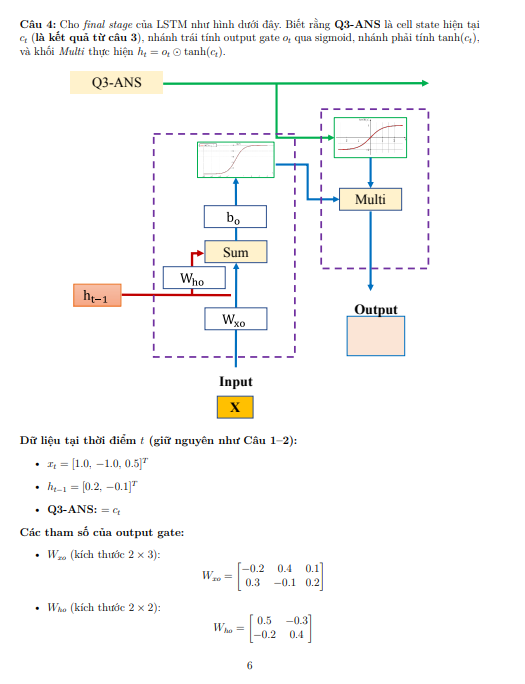

In [19]:
W_xo= torch.Tensor([[-0.2, 0.4, 0.1],
                    [0.3, -0.1, 0.2]])
W_ho= torch.Tensor([[0.5, -0.3],
                    [-0.2, 0.4]])
bias =torch.Tensor([[0.0],
                   [-0.1]])

In [20]:
z_o= W_xo@x + W_ho@h_previous +bias

In [21]:
out_curent= torch.sigmoid(z_o)


In [22]:
hidden_t= out_curent * torch.tanh(c_t_new)

In [23]:
hidden_t

tensor([[ 0.3530],
        [-0.1084]])

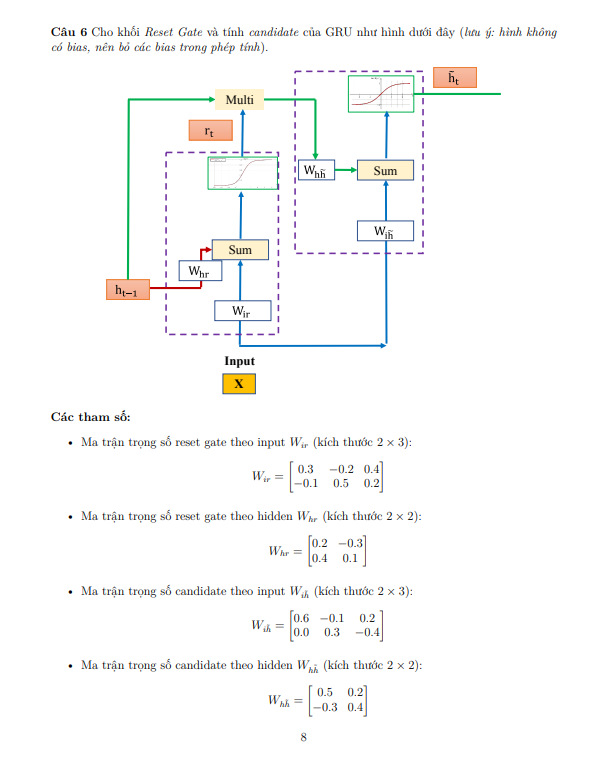

In [30]:
W_ir = torch.Tensor([[0.3, -0.2,  0.4],
                     [-0.1, 0.5, 0.2]])
W_hr = torch.Tensor([[0.2, -0.3],
                     [0.4, 0.1]])

W_ih= torch.Tensor([[0.6, -0.1, 0.2],
                    [0.0, 0.3, -0.4]])

W_hh= torch.Tensor([[0.5, 0.2],
                    [-0.3, 0.4]])

In [36]:
z_r= W_ir@x +W_hr@h_previous
reset_gate_1 = torch.sigmoid(z_r)

In [37]:
reset_gate_1.shape, W_hh.shape

(torch.Size([2, 1]), torch.Size([2, 2]))

In [38]:
z_h = W_ih@x + W_hh@(reset_gate_1*h_previous)

In [40]:
candidate_cell_gru= torch.tanh(z_h)
candidate_cell_gru

tensor([[ 0.6965],
        [-0.5056]])

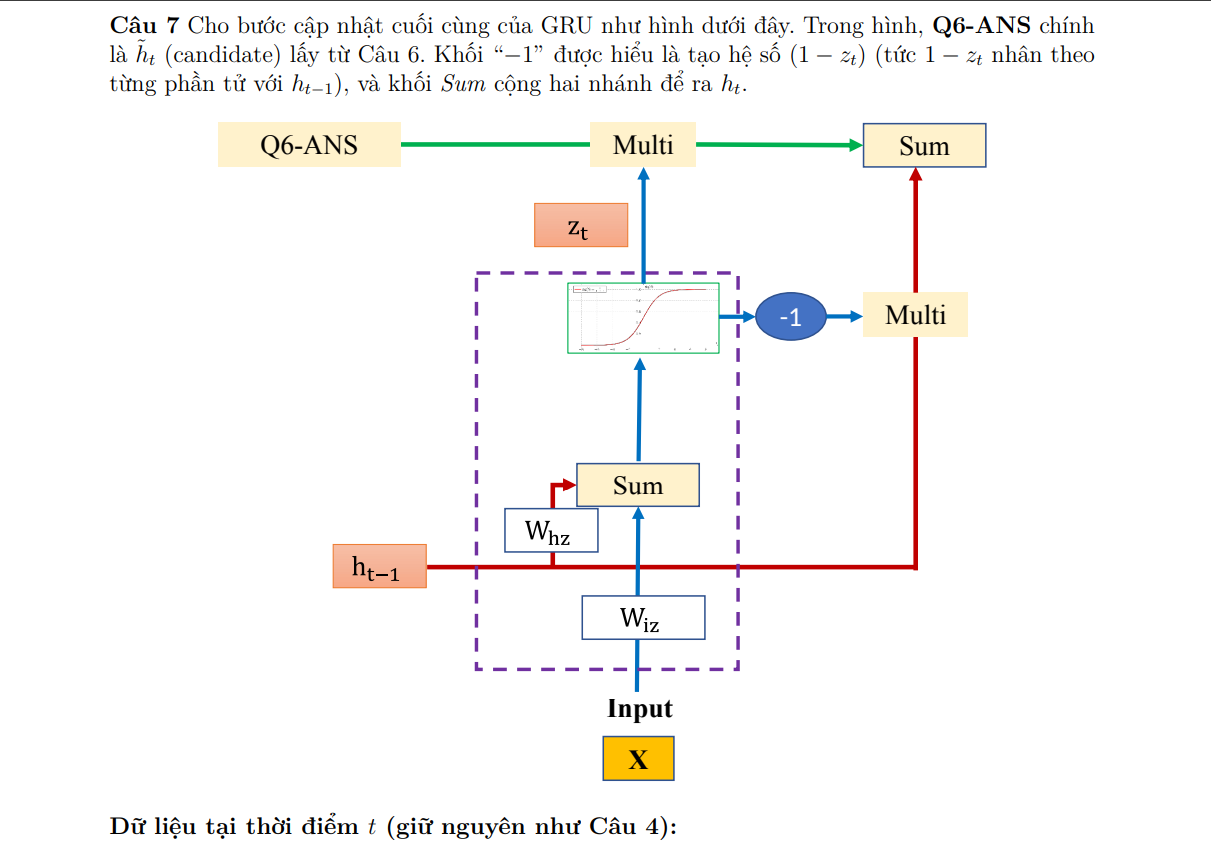

In [41]:
W_iz= torch.Tensor([
    [0.2, -0.3, 0.4],
    [-0.1,  0.2,  0.1]
])
W_hz= torch.Tensor([
    [0.3,  0.1],
    [-0.2, 0.4]
])

In [42]:
z_previous= W_iz@x + W_hz@h_previous
z_t= torch.sigmoid(z_previous)

In [45]:
z_t

tensor([[0.6792],
        [0.4182]])

In [44]:
h_t = z_t * candidate_cell_gru + (1-z_t) * h_previous
h_t

tensor([[ 0.5372],
        [-0.2696]])